# importing packages


In [29]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix , classification_report
!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import KFold , cross_val_score
from sklearn.model_selection import GridSearchCV

# loading the dataset


In [30]:
url = "https://raw.githubusercontent.com/ronydebnath/STDS-15/main/Dataset/heart_2020_cleaned.csv?token=GHSAT0AAAAAACHSU2OQOR67NPLGHE3UPBIIZIJGDTA"
df = pd.read_csv(url)

# General info about the dataset


In [31]:
df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [32]:
df.shape

(319795, 18)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

there is no null object in our dataset

In [34]:
# checking the duplicate
df.duplicated().sum()

18078

In [35]:
# General description about our dataset
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [36]:
df['AgeCategory'].value_counts()


65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

# changing values(yes,no)into numeric values 0,1

In [37]:
df['AgeCategory'] = df['AgeCategory'].str[:2]


In [38]:
df=df.replace('No','0')
df= df.replace('Yes','1')
df=df.replace('Female','0')
df= df.replace('Male','1')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60,Hispanic,1,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35,Hispanic,0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45,Hispanic,0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25,Hispanic,0,0,Good,12.0,0,0,0


# changing general health into numeric values

In [39]:
df['GenHealth']=df['GenHealth'].replace('Poor','0')
df['GenHealth']=df['GenHealth'].replace('Fair','1')
df['GenHealth']=df['GenHealth'].replace('Good','2')
df['GenHealth']=df['GenHealth'].replace('Very good','3')
df['GenHealth']=df['GenHealth'].replace('Excellent','4')

In [40]:
df["Diabetic"]=df['Diabetic'].replace('No, borderline diabetes','3')
df["Diabetic"]=df['Diabetic'].replace('Yes (during pregnancy)','4')

In [41]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55,White,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,White,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65,White,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75,White,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40,White,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60,Hispanic,1,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35,Hispanic,0,1,3,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45,Hispanic,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25,Hispanic,0,0,2,12.0,0,0,0


In [42]:
x = df.drop(['HeartDisease','Race'],axis = 1)


In [43]:
y = df['HeartDisease']


In [44]:
x


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,55,1,1,3,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,80,0,1,3,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,65,1,1,1,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,75,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,40,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,1,60,1,0,1,6.0,1,0,0
319791,29.84,1,0,0,0.0,0.0,0,1,35,0,1,3,5.0,1,0,0
319792,24.24,0,0,0,0.0,0.0,0,0,45,0,1,2,6.0,0,0,0
319793,32.81,0,0,0,0.0,0.0,0,0,25,0,0,2,12.0,0,0,0


In [45]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               319795 non-null  float64
 1   Smoking           319795 non-null  object 
 2   AlcoholDrinking   319795 non-null  object 
 3   Stroke            319795 non-null  object 
 4   PhysicalHealth    319795 non-null  float64
 5   MentalHealth      319795 non-null  float64
 6   DiffWalking       319795 non-null  object 
 7   Sex               319795 non-null  object 
 8   AgeCategory       319795 non-null  object 
 9   Diabetic          319795 non-null  object 
 10  PhysicalActivity  319795 non-null  object 
 11  GenHealth         319795 non-null  object 
 12  SleepTime         319795 non-null  float64
 13  Asthma            319795 non-null  object 
 14  KidneyDisease     319795 non-null  object 
 15  SkinCancer        319795 non-null  object 
dtypes: float64(4), objec

In [46]:
x=x.astype('float32')


In [47]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               319795 non-null  float32
 1   Smoking           319795 non-null  float32
 2   AlcoholDrinking   319795 non-null  float32
 3   Stroke            319795 non-null  float32
 4   PhysicalHealth    319795 non-null  float32
 5   MentalHealth      319795 non-null  float32
 6   DiffWalking       319795 non-null  float32
 7   Sex               319795 non-null  float32
 8   AgeCategory       319795 non-null  float32
 9   Diabetic          319795 non-null  float32
 10  PhysicalActivity  319795 non-null  float32
 11  GenHealth         319795 non-null  float32
 12  SleepTime         319795 non-null  float32
 13  Asthma            319795 non-null  float32
 14  KidneyDisease     319795 non-null  float32
 15  SkinCancer        319795 non-null  float32
dtypes: float32(16)
memor

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)

In [49]:
y.value_counts()


0    292422
1     27373
Name: HeartDisease, dtype: int64

<AxesSubplot:ylabel='HeartDisease'>

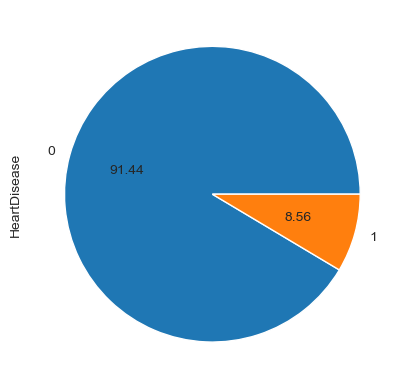

In [50]:
 y.value_counts().plot.pie(autopct = '%0.2f')


In [51]:
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler


In [52]:
RUS = RandomUnderSampler(sampling_strategy=1)


In [53]:
x_res , y_res = RUS.fit_resample(x_train,y_train)


<AxesSubplot:ylabel='HeartDisease'>

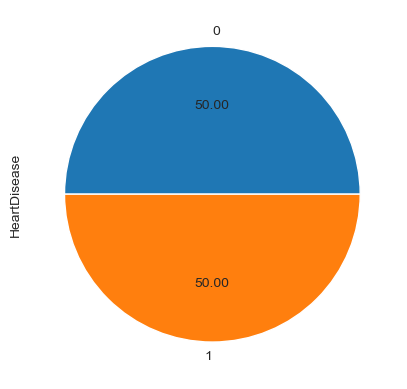

In [54]:
y_res.value_counts().plot.pie(autopct='%.2f')


In [55]:
y_res.value_counts()


0    21911
1    21911
Name: HeartDisease, dtype: int64

In [56]:
x_res


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
165505,25.530001,1.0,0.0,0.0,0.0,0.0,0.0,1.0,70.0,1.0,1.0,3.0,5.0,1.0,0.0,0.0
313176,31.469999,1.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,0.0,1.0,3.0,7.0,0.0,0.0,0.0
148315,25.100000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.0,0.0,1.0,4.0,7.0,0.0,0.0,0.0
299106,30.540001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45.0,1.0,0.0,1.0,6.0,0.0,0.0,0.0
300529,25.100000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,0.0,1.0,3.0,7.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189650,18.650000,1.0,0.0,0.0,8.0,0.0,1.0,1.0,60.0,0.0,0.0,1.0,12.0,0.0,0.0,0.0
209121,30.540001,1.0,0.0,0.0,6.0,0.0,0.0,1.0,75.0,0.0,0.0,2.0,9.0,0.0,0.0,0.0
54746,31.750000,0.0,0.0,0.0,0.0,30.0,1.0,0.0,75.0,1.0,1.0,2.0,8.0,0.0,0.0,0.0
86407,30.270000,0.0,0.0,0.0,14.0,0.0,0.0,1.0,70.0,0.0,1.0,2.0,7.0,0.0,0.0,0.0


# Decision tree classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier


In [58]:
dt = DecisionTreeClassifier(max_depth = 5 , max_features= 4)


In [59]:
dt.fit(x_res,y_res)


DecisionTreeClassifier(max_depth=5, max_features=4)

In [60]:
dt.score(x_res,y_res)


0.7333987494865593

In [61]:
dt.score(x_test,y_test)


0.6326396597820478

In [62]:
y_pred = dt.predict(x_test)


# Evaluation

In [63]:
con = confusion_matrix(y_test , y_pred)
con



array([[35748, 22749],
       [  747,  4715]])

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

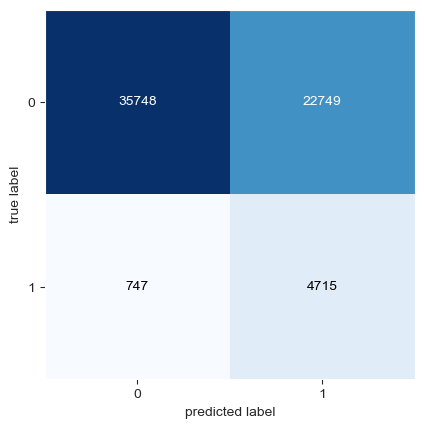

In [64]:
plot_confusion_matrix(con )


In [65]:
print (classification_report(y_test , y_pred))


              precision    recall  f1-score   support

           0       0.98      0.61      0.75     58497
           1       0.17      0.86      0.29      5462

    accuracy                           0.63     63959
   macro avg       0.58      0.74      0.52     63959
weighted avg       0.91      0.63      0.71     63959



In [66]:
# cross validation

In [67]:
K_fold = KFold(n_splits= 3 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(dt , x,y , cv = K_fold , scoring= scoring)
print (score)

[0.91390163 0.91512974 0.91572075]


In [68]:
round(np.mean(score)*100 , 2)


91.49

# Random oversampling

# Logistic regression


In [69]:
from imblearn.over_sampling import RandomOverSampler


In [70]:
ROS = RandomOverSampler(sampling_strategy = 1)


In [71]:
x_res, y_res = ROS.fit_resample(x_train,y_train)

<AxesSubplot:ylabel='HeartDisease'>

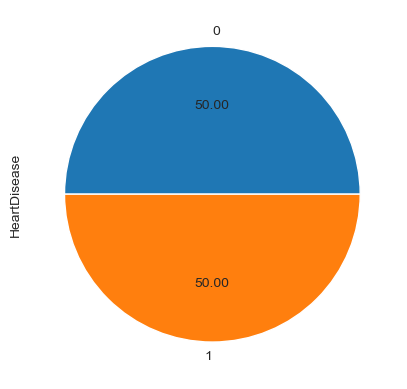

In [72]:
y_res.value_counts().plot.pie(autopct = "%.2f")


In [73]:
y_res.value_counts()


0    233925
1    233925
Name: HeartDisease, dtype: int64

In [74]:
# logistic regression

In [75]:
from sklearn.linear_model import LogisticRegression


In [76]:
LOG = LogisticRegression().fit(x_res, y_res)


/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
LOG.score(x_res,y_res)


0.7585486801325211

In [78]:
LOG.score(x_test,y_test)


0.7531074594662206

In [79]:
y_pred= LOG.predict(x_test)


In [80]:
#Evaluation¶


In [81]:
con = confusion_matrix(y_test , y_pred)
con

array([[43931, 14566],
       [ 1225,  4237]])

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

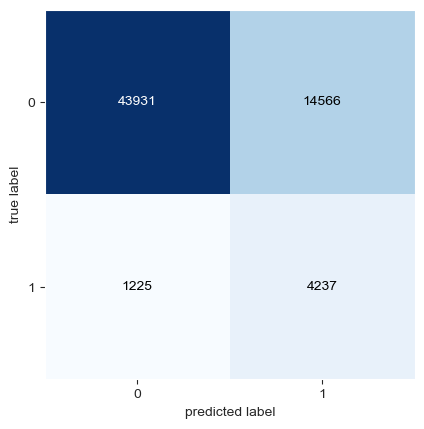

In [82]:
plot_confusion_matrix(con )


In [83]:
print (classification_report(y_test , y_pred))


              precision    recall  f1-score   support

           0       0.97      0.75      0.85     58497
           1       0.23      0.78      0.35      5462

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.81     63959



In [84]:
# Cross validation

In [85]:
K_fold = KFold(n_splits= 3 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(LOG , x,y , cv = K_fold , scoring= scoring)
print (score)


/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[0.91407987 0.91527046 0.91601156]


/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
round(np.mean(score)*100 , 2)


91.51

# Random Forest Classifier


In [87]:
from imblearn.over_sampling import SMOTE 
sm= SMOTE()


In [88]:
x_res,y_res = sm.fit_resample(x_train,y_train)


<AxesSubplot:ylabel='HeartDisease'>

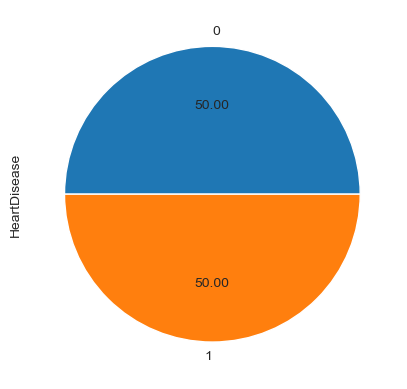

In [89]:
y_res.value_counts().plot.pie(autopct='%.2f')

In [90]:
from sklearn.ensemble import RandomForestClassifier


In [91]:
rf = RandomForestClassifier(n_estimators= 4 , max_depth=3 ,max_features= 4)


In [92]:
rf.fit(x_res,y_res)


RandomForestClassifier(max_depth=3, max_features=4, n_estimators=4)

In [93]:
rf.score(x_res,y_res)


0.7814128459976488

In [94]:
rf.score(x_test,y_test)


0.7849090823809003

In [95]:
y_pred = rf.predict(x_test)


In [96]:
#Evaluation¶


In [97]:
con = confusion_matrix(y_test , y_pred)
con

array([[46565, 11932],
       [ 1825,  3637]])

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

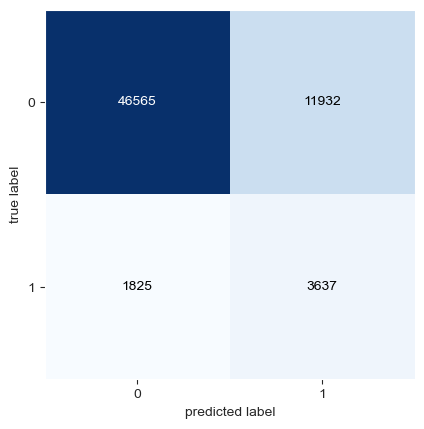

In [98]:
plot_confusion_matrix(con )


In [99]:
print (classification_report(y_test , y_pred))


              precision    recall  f1-score   support

           0       0.96      0.80      0.87     58497
           1       0.23      0.67      0.35      5462

    accuracy                           0.78     63959
   macro avg       0.60      0.73      0.61     63959
weighted avg       0.90      0.78      0.83     63959



# Cross validation

In [100]:
K_fold = KFold(n_splits= 3 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(rf , x,y , cv = K_fold , scoring= scoring)
print (score)

[0.91344196 0.9146044  0.91522355]


In [101]:
round(np.mean(score)*100 , 2)


91.44

In [102]:
pram_grid = {"max_depth": [2,3,4] , 'max_features': [3,4,5] }


In [103]:
pram_grid


{'max_depth': [2, 3, 4], 'max_features': [3, 4, 5]}

In [104]:
clf = DecisionTreeClassifier()
grid = GridSearchCV(estimator= clf , param_grid= pram_grid , cv = 5 )
grid_result = grid.fit(x_train , y_train)

grid_result

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4], 'max_features': [3, 4, 5]})

In [105]:
print ("Best: %f using %s" %(grid_result.best_score_ , grid_result.best_params_))

Best: 0.914668 using {'max_depth': 4, 'max_features': 5}


In [106]:
model = grid_result.best_estimator_
model


DecisionTreeClassifier(max_depth=4, max_features=5)

In [107]:
model.predict(x_test)


array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [108]:
con = confusion_matrix(y_test , model.predict(x_test) )
con

array([[58367,   130],
       [ 5310,   152]])

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

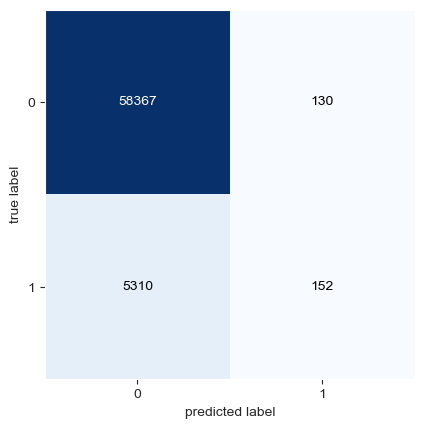

In [109]:
plot_confusion_matrix(con )


In [110]:
print (classification_report(y_test , model.predict(x_test)))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     58497
           1       0.54      0.03      0.05      5462

    accuracy                           0.91     63959
   macro avg       0.73      0.51      0.50     63959
weighted avg       0.88      0.91      0.88     63959



In [111]:
# Standard scalar


In [112]:
# Standardization of numeric data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_res)

X_train_scaled = scaler.transform(x_res)
X_test_scaled = scaler.transform(x_test)

X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=x_res.columns)
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=x_test.columns)
X_test_scaled.describe()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000
mean,-0.074086,-0.165383,0.081187,-0.182046,-0.196211,-0.029835,-0.237107,-0.122678,-0.369252,-0.117101,0.130009,0.334442,-0.015434,-0.032375,-0.136891,-0.104118
std,0.994074,1.030919,1.198420,0.767159,0.802189,0.938441,0.859757,1.048957,1.057144,1.038367,0.980429,0.943762,0.963211,1.036424,0.828653,0.934300
min,-2.610283,-1.030055,-0.245943,-0.334599,-0.537055,-0.493580,-0.582035,-1.122302,-2.383688,-0.489183,-1.694852,-2.009383,-4.086037,-0.441914,-0.299644,-0.404247
25%,-0.744985,-1.030055,-0.245943,-0.334599,-0.537055,-0.493580,-0.582035,-1.122302,-1.093997,-0.489183,0.656589,-0.201746,-0.744331,-0.441914,-0.299644,-0.404247
50%,-0.231443,-1.030055,-0.245943,-0.334599,-0.537055,-0.493580,-0.582035,-1.122302,-0.214663,-0.489183,0.656589,0.702073,-0.075990,-0.441914,-0.299644,-0.404247
75%,0.392924,1.064005,-0.245943,-0.334599,-0.336075,-0.142100,-0.582035,0.977768,0.371560,-0.489183,0.656589,0.702073,0.592351,-0.441914,-0.299644,-0.404247
max,10.309441,1.064005,4.470809,3.672918,2.477646,3.021224,1.906720,0.977768,1.250894,6.026683,0.656589,1.605892,11.285810,2.590754,4.077679,2.804512
